# Exercise 3 - Radial Basis Function Neural Network

#### Aim:
To implement Radial Basis Function Neural Network model using Python Programming.
#### Program:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class RBF:  
    def __init__(self, n_inputs, n_hidden, n_outputs,sigma,random_state=None):  
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.random_state = random_state
        
        # gamma is the constant to be multipled with squared Euclidean distance in RBF
        self.gamma = 1/(2*sigma**2)
        
        # weights connecting the hidden layer and output layer
        self.W = np.random.random((n_outputs, n_hidden))  
        
    def rbf_kernal(self, x,c):  
        return np.exp(-self.gamma * np.linalg.norm(x-c,axis=-1)**2)  
    
    def activation(self,X):
        return self.rbf_kernal(
            self.hidden[:,np.newaxis,:],
            X[np.newaxis,:,:]
        )
        
    def fit(self, X, Y):    
        # choose random center vectors from training set  
        if self.random_state is not None:
            np.random.seed(self.random_state)
        rnd_idx = np.random.choice(X.shape[0],self.n_hidden)
        self.hidden = X[rnd_idx]

        # calculate output weights using pseudoinverse  
        self.W = Y.T @ np.linalg.pinv(self.activation(X))
        
    def predict(self, X):  
        return (self.W @ self.activation(X)).T

In [3]:
x = np.linspace(-1,1,100).reshape(-1, 1)  
# set y and add random noise  
y = np.sin(3*(x+0.5)**3-1)  
np.random.seed(5)
y += np.random.normal(0, 0.1, y.shape)  

In [4]:
# rbf regression  
sigma=1
random_state=1
rbf = RBF(1, 10, 1,sigma=1,random_state=1)  
rbf.fit(x, y)  
y_pred = rbf.predict(x)  

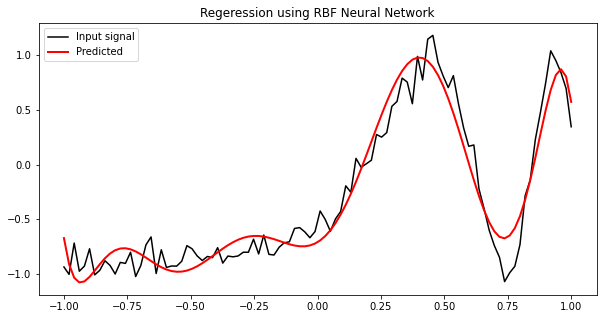

In [5]:
plt.figure(figsize=(10, 5))  
plt.plot(x, y, 'k',label="Input signal")  
plt.plot(x, y_pred, 'r', linewidth=2,label="Predicted")  
plt.title("Regeression using RBF Neural Network")
plt.legend()
plt.show()